# Machine Learning Foundation

## Section 1, Part d: Feature Engineering 

## Feature Engineering with Linear Regression: Applied to the Ames Housing Data

Using the Ames Housing Data:

Dean De Cock
Truman State University
Journal of Statistics Education Volume 19, Number 3(2011), www.amstat.org/publications/jse/v19n3/decock.pdf

In this notebook, we will build some linear regression models to predict housing prices from this data. In particular, we will set out to improve on a baseline set of features via **feature engineering**: deriving new features from our existing data. Feature engineering often makes the difference between a weak model and a strong one.

We will use visual exploration, domain understanding, and intuition to construct new features that will be useful later in the course as we turn to prediction.

**Notebook Contents**

> 1. Simple EDA 
> 2. One-hot Encoding variables
> 3. Log transformation for skewed variables
> 4. Pair plot for features
> 5. Basic feature engineering: adding polynomial and interaction terms
> 6. Feature engineering: categories and features derived from category aggregates 

## 1. Simple EDA 

In [3]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import pandas as pd
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


#### Load the Data, Examine and Explore

In [4]:
## Load in the Ames Housing Data
datafile = r"D:\git\EDA\01d_DEMO_Feature_Engineering\data\Ames_Housing_data.tsv"
df = pd.read_csv(datafile, sep='\t')

In [3]:
df

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0      NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1      NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2      NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3      NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4      NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   
...    ...       ...          ...  ...       ...     ...    ...          ...   
2925   NaN       IR1          Lvl  ...         0     NaN  GdPrv          NaN   
2926   NaN       IR1          Low  ...         0     NaN  MnPrv          NaN   
2927   NaN       Reg          Lvl  ...         0     NaN  MnPrv         Shed   
2928   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
2929   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   

     Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0           0       5    2010       WD           Normal     215000  
1           0       6    2010       WD           Normal     105000  
2       12500       6    2010       WD           Normal     172000  
3           0       4    2010       WD           Normal     244000  
4           0       3    2010       WD           Normal     189900  
...       ...     ...     ...       ...             ...        ...  
2925        0       3    2006       WD           Normal     142500  
2926        0       6    2006       WD           Normal     131000  
2927      700       7    2006       WD           Normal     132000  
2928        0       4    2006       WD           Normal     170000  
2929        0      11    2006       WD           Normal     188000  

[2930 rows x 82 columns]

In [4]:
## Examine the columns, look at missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

array([[<AxesSubplot:title={'center':'Order'}>,
        <AxesSubplot:title={'center':'PID'}>,
        <AxesSubplot:title={'center':'MS SubClass'}>,
        <AxesSubplot:title={'center':'Lot Frontage'}>,
        <AxesSubplot:title={'center':'Lot Area'}>,
        <AxesSubplot:title={'center':'Overall Qual'}>],
       [<AxesSubplot:title={'center':'Overall Cond'}>,
        <AxesSubplot:title={'center':'Year Built'}>,
        <AxesSubplot:title={'center':'Year Remod/Add'}>,
        <AxesSubplot:title={'center':'Mas Vnr Area'}>,
        <AxesSubplot:title={'center':'BsmtFin SF 1'}>,
        <AxesSubplot:title={'center':'BsmtFin SF 2'}>],
       [<AxesSubplot:title={'center':'Bsmt Unf SF'}>,
        <AxesSubplot:title={'center':'Total Bsmt SF'}>,
        <AxesSubplot:title={'center':'1st Flr SF'}>,
        <AxesSubplot:title={'center':'2nd Flr SF'}>,
        <AxesSubplot:title={'center':'Low Qual Fin SF'}>,
        <AxesSubplot:title={'center':'Gr Liv Area'}>],
       [<AxesSubplot:title={'c

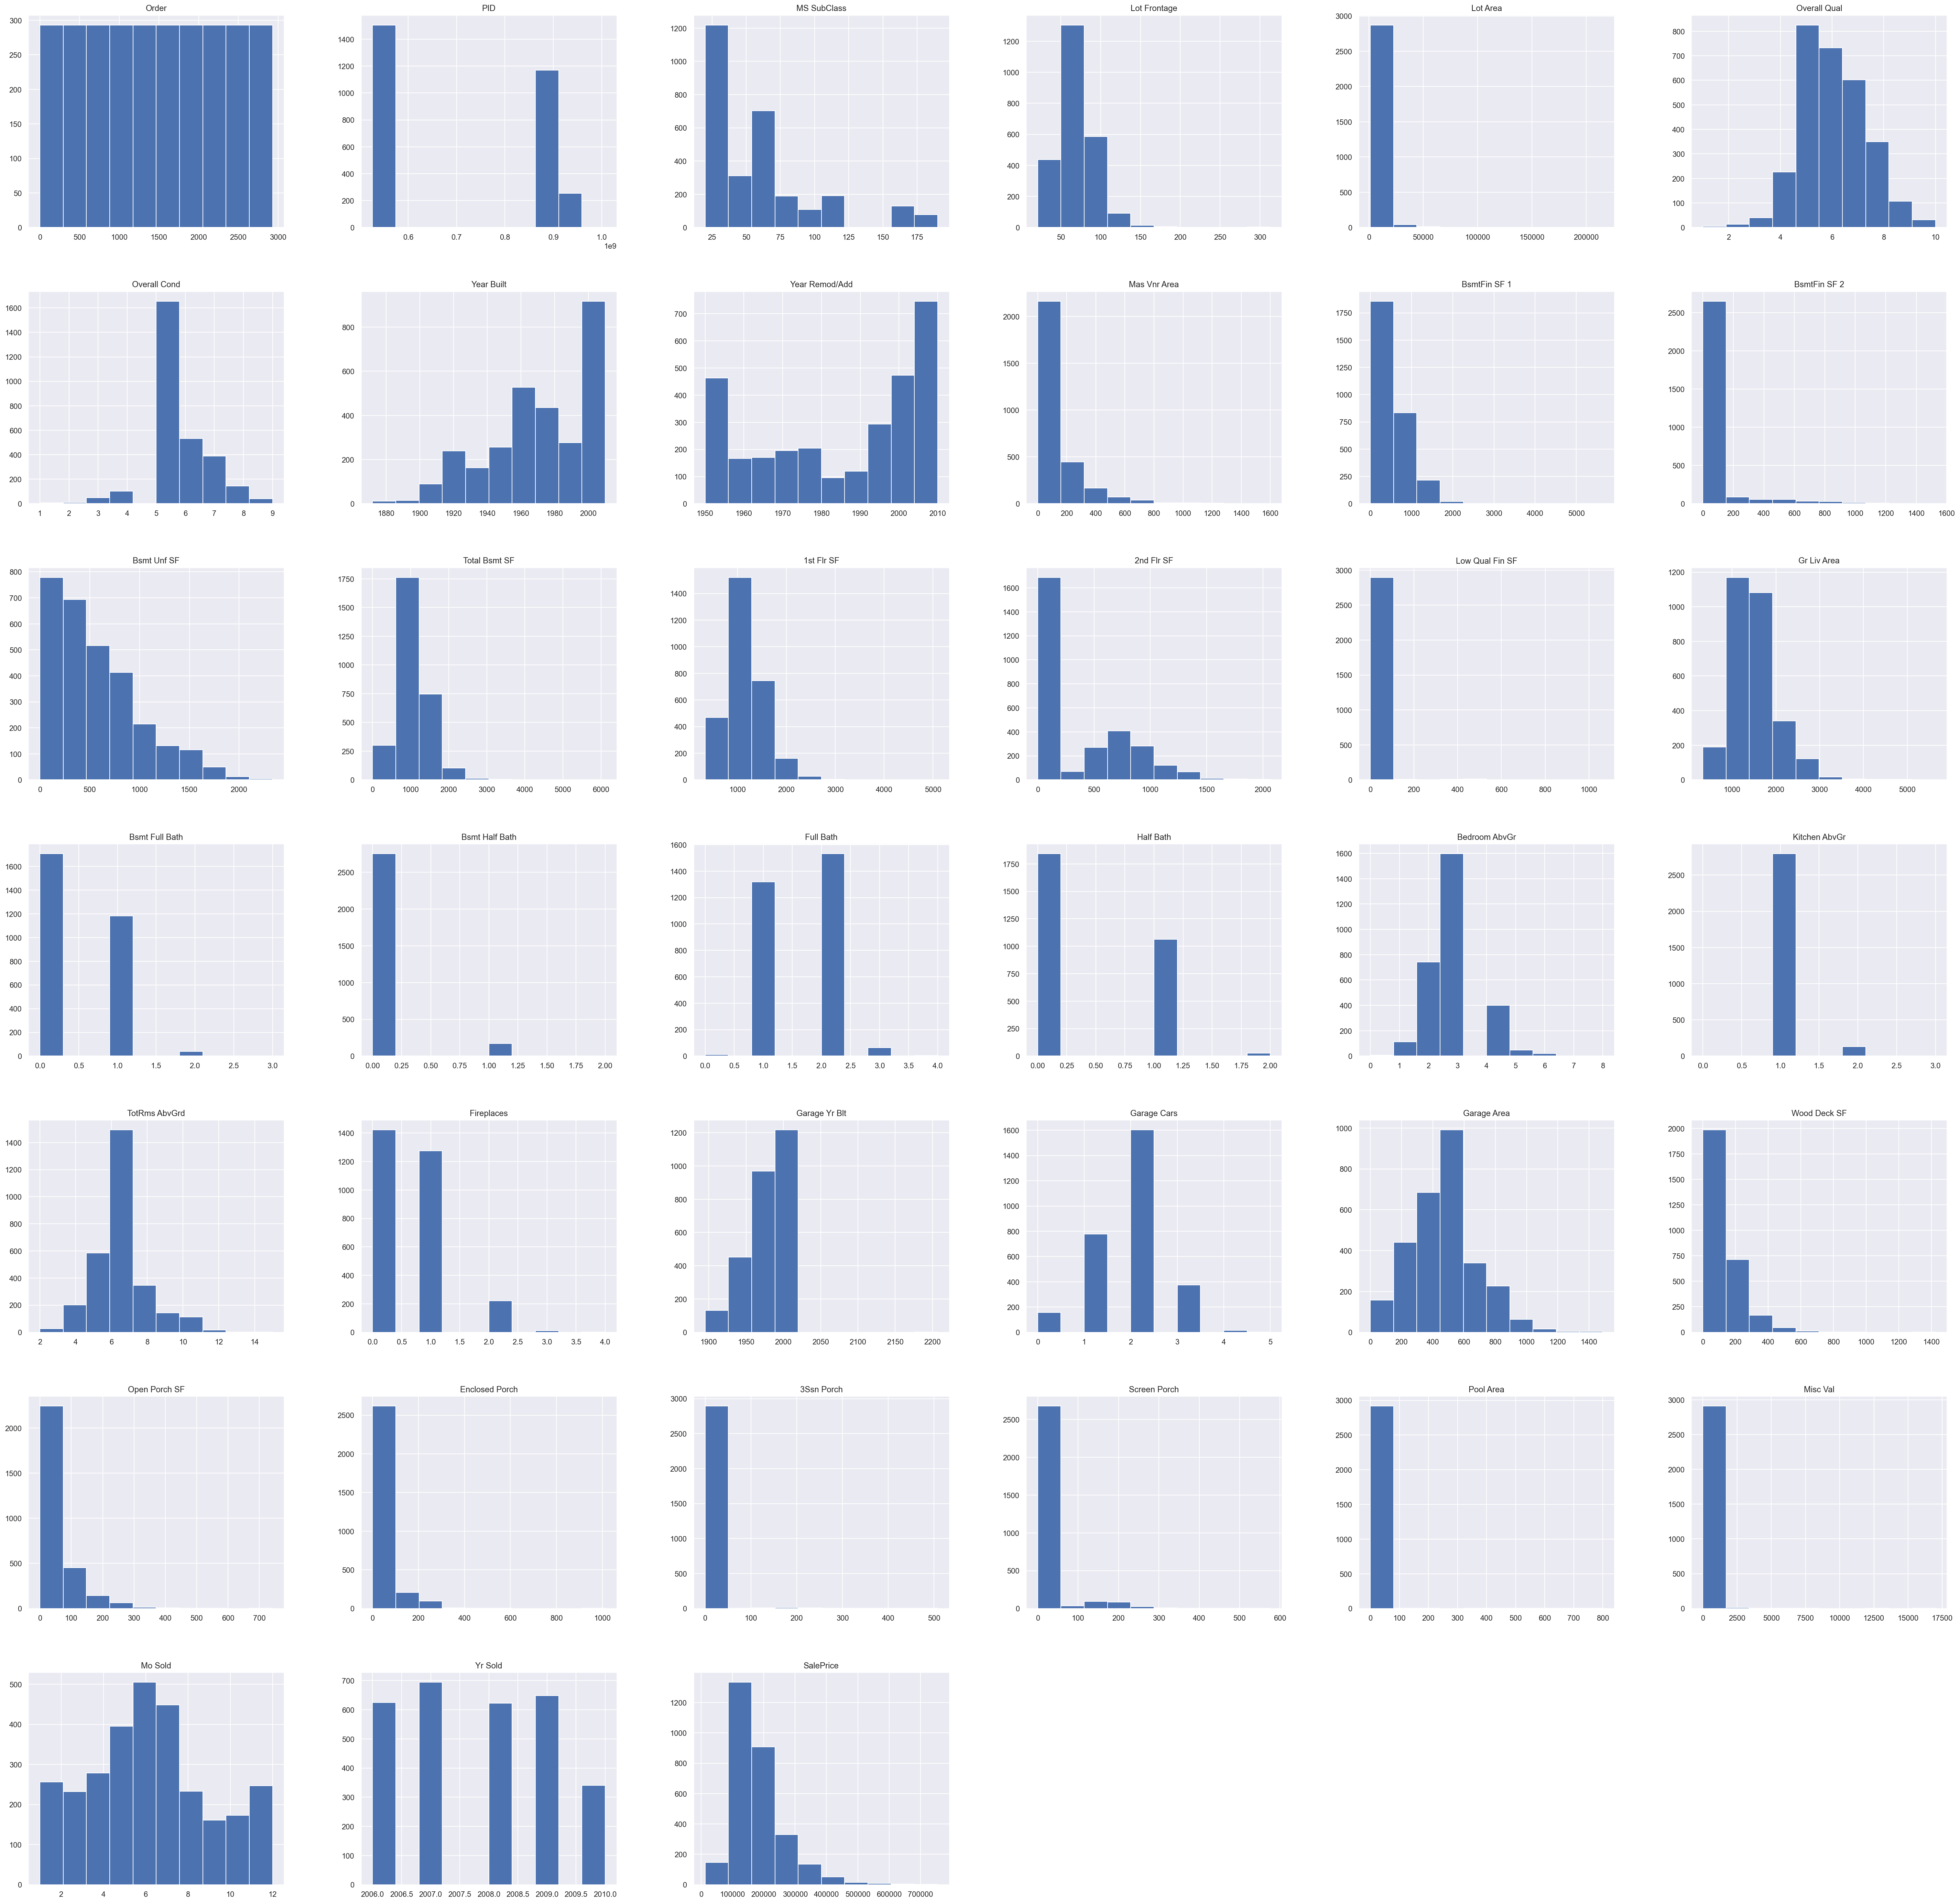

In [5]:
df.hist(figsize =(50,50))

<AxesSubplot:>

<AxesSubplot:>

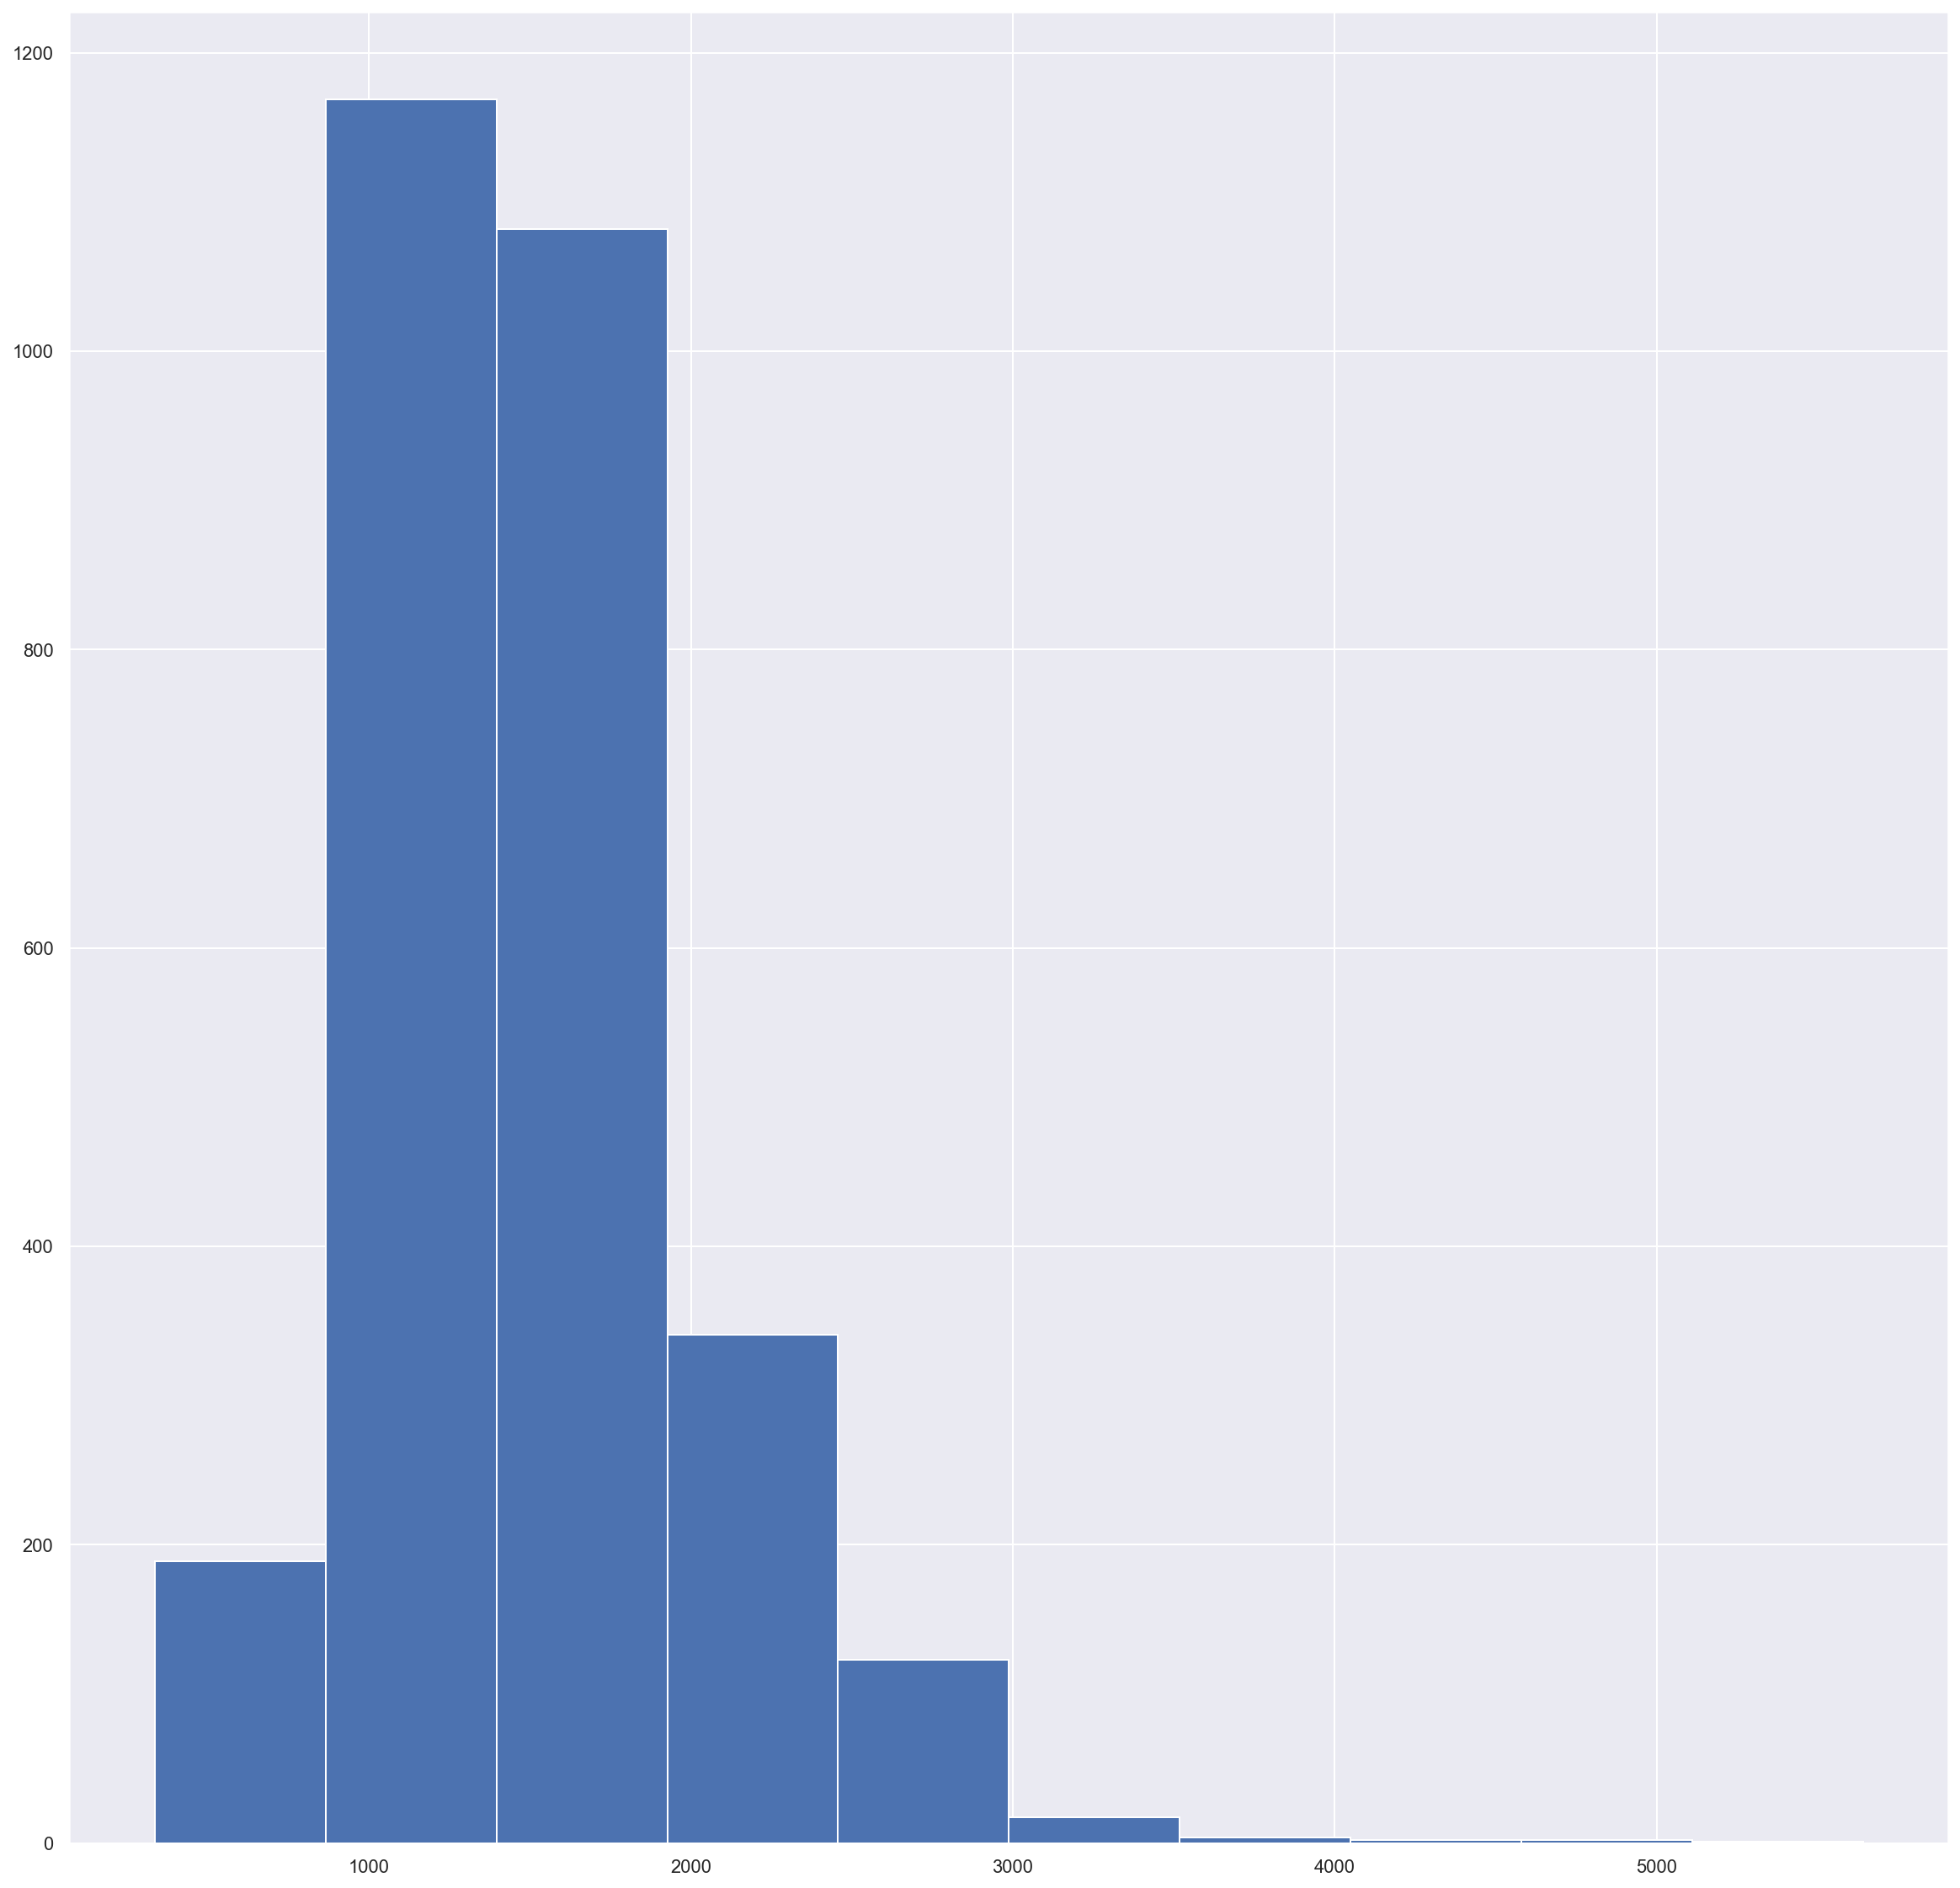

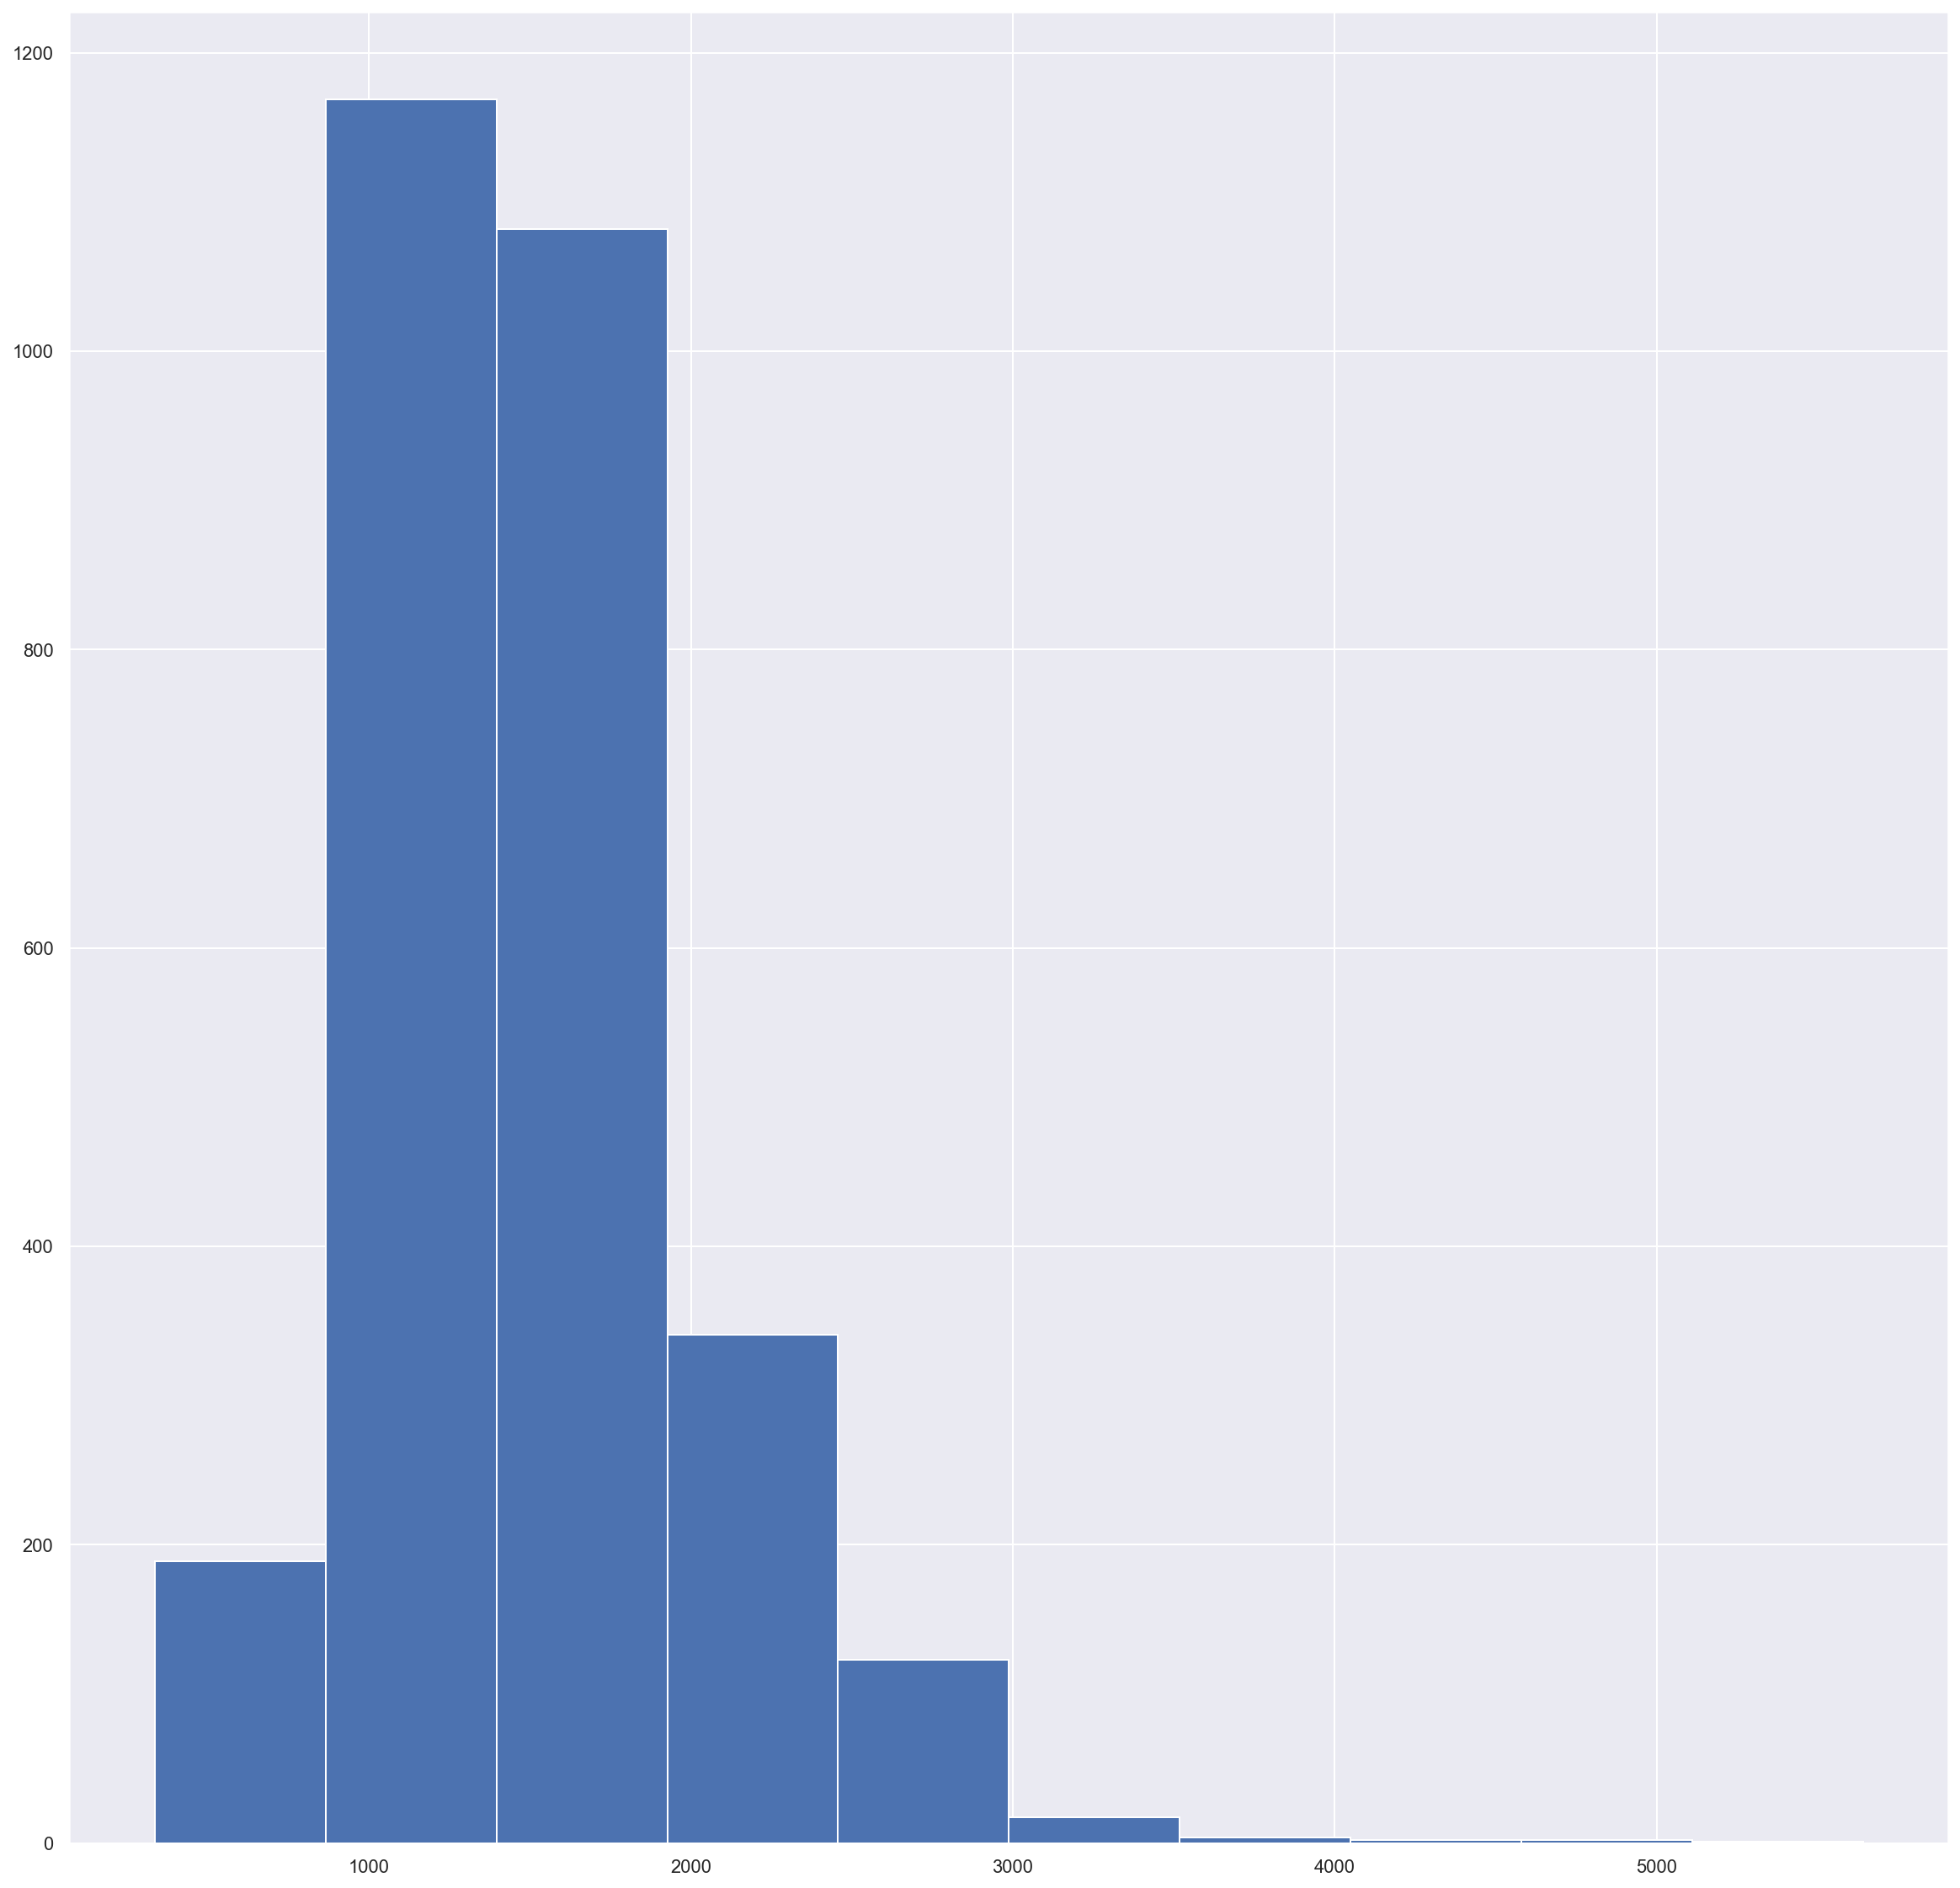

In [5]:
df['Gr Liv Area'].hist(figsize=(20,20))

In [6]:
# Keep a copy our original data
data = df.copy()


# This is recommended by the data set author to remove a few outliers
df = df.loc[df['Gr Liv Area'] <= 4000,:]
print("Number of rows in the data:", df.shape[0])
print("Number of columns in the data:", df.shape[1])
  

Number of rows in the data: 2925
Number of columns in the data: 82
Number of rows in the data: 2925
Number of columns in the data: 82


In [8]:
# A quick look at the data:
df.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0       5    2010       WD           Normal     215000  
1        0       6    2010       WD           Normal     105000  
2    12500       6    2010       WD           Normal     172000  
3        0       4    2010       WD           Normal     244000  
4        0       3    2010       WD           Normal     189900  

[5 rows x 82 columns]

In [9]:
df.PID.unique()

array([526301100, 526350040, 526351010, ..., 923400125, 924100070,
       924151050], dtype=int64)

In [10]:
len(df.PID.unique())

2925

In [11]:
len(df.Order.unique())

2925

In [12]:
df.drop(['PID','Order'], axis=1, inplace=True)

F:\Jupyter\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
df.head()

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
0           20        RL         141.0     31770   Pave   NaN       IR1   
1           20        RH          80.0     11622   Pave   NaN       Reg   
2           20        RL          81.0     14267   Pave   NaN       IR1   
3           20        RL          93.0     11160   Pave   NaN       Reg   
4           60        RL          74.0     13830   Pave   NaN       IR1   

  Land Contour Utilities Lot Config  ... Pool Area Pool QC  Fence  \
0          Lvl    AllPub     Corner  ...         0     NaN    NaN   
1          Lvl    AllPub     Inside  ...         0     NaN  MnPrv   
2          Lvl    AllPub     Corner  ...         0     NaN    NaN   
3          Lvl    AllPub     Corner  ...         0     NaN    NaN   
4          Lvl    AllPub     Inside  ...         0     NaN  MnPrv   

  Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  Sale Condition  SalePrice  
0          NaN        0       5     2010        WD           Normal     215000  
1          NaN        0       6     2010        WD           Normal     105000  
2         Gar2    12500       6     2010        WD           Normal     172000  
3          NaN        0       4     2010        WD           Normal     244000  
4          NaN        0       3     2010        WD           Normal     189900  

[5 rows x 80 columns]

We're going to first do some basic data cleaning on this data: 

* Converting categorical variables to dummies
* Making skew variables symmetric

### One-hot encoding for dummy variables:

In [17]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = df.dtypes[df.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

df[one_hot_encode_cols].head().T

<ipython-input-17-a480c4e465cb>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  one_hot_encode_cols = df.dtypes[df.dtypes == np.object]  # filtering by string categoricals


0        1        2        3        4
MS Zoning            RL       RH       RL       RL       RL
Street             Pave     Pave     Pave     Pave     Pave
Alley               NaN      NaN      NaN      NaN      NaN
Lot Shape           IR1      Reg      IR1      Reg      IR1
Land Contour        Lvl      Lvl      Lvl      Lvl      Lvl
Utilities        AllPub   AllPub   AllPub   AllPub   AllPub
Lot Config       Corner   Inside   Corner   Corner   Inside
Land Slope          Gtl      Gtl      Gtl      Gtl      Gtl
Neighborhood      NAmes    NAmes    NAmes    NAmes  Gilbert
Condition 1        Norm    Feedr     Norm     Norm     Norm
Condition 2        Norm     Norm     Norm     Norm     Norm
Bldg Type          1Fam     1Fam     1Fam     1Fam     1Fam
House Style      1Story   1Story   1Story   1Story   2Story
Roof Style          Hip    Gable      Hip      Hip    Gable
Roof Matl       CompShg  CompShg  CompShg  CompShg  CompShg
Exterior 1st    BrkFace  VinylSd  Wd Sdng  BrkFace  VinylSd
Exterior 2nd    Plywood  VinylSd  Wd Sdng  BrkFace  VinylSd
Mas Vnr Type      Stone     None  BrkFace     None     None
Exter Qual           TA       TA       TA       Gd       TA
Exter Cond           TA       TA       TA       TA       TA
Foundation       CBlock   CBlock   CBlock   CBlock    PConc
Bsmt Qual            TA       TA       TA       TA       Gd
Bsmt Cond            Gd       TA       TA       TA       TA
Bsmt Exposure        Gd       No       No       No       No
BsmtFin Type 1      BLQ      Rec      ALQ      ALQ      GLQ
BsmtFin Type 2      Unf      LwQ      Unf      Unf      Unf
Heating            GasA     GasA     GasA     GasA     GasA
Heating QC           Fa       TA       TA       Ex       Gd
Central Air           Y        Y        Y        Y        Y
Electrical        SBrkr    SBrkr    SBrkr    SBrkr    SBrkr
Kitchen Qual         TA       TA       Gd       Ex       TA
Functional          Typ      Typ      Typ      Typ      Typ
Fireplace Qu         Gd      NaN      NaN       TA       TA
Garage Type      Attchd   Attchd   Attchd   Attchd   Attchd
Garage Finish       Fin      Unf      Unf      Fin      Fin
Garage Qual          TA       TA       TA       TA       TA
Garage Cond          TA       TA       TA       TA       TA
Paved Drive           P        Y        Y        Y        Y
Pool QC             NaN      NaN      NaN      NaN      NaN
Fence               NaN    MnPrv      NaN      NaN    MnPrv
Misc Feature        NaN      NaN     Gar2      NaN      NaN
Sale Type           WD       WD       WD       WD       WD 
Sale Condition   Normal   Normal   Normal   Normal   Normal

We're going to first do some basic data cleaning on this data: 

* Converting categorical variables to dummies
* Making skew variables symmetric

#### One-hot encoding the dummy variables:

In [ ]:
# Do the one hot encoding
df = pd.get_dummies(df, columns=one_hot_encode_cols, drop_first=True)
df.describe().T

### Log transforming skew variables

# Log transformation (video)

In [14]:
df.select_dtypes('number')

MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0              20         141.0     31770             6             5   
1              20          80.0     11622             5             6   
2              20          81.0     14267             6             6   
3              20          93.0     11160             7             5   
4              60          74.0     13830             5             5   
...           ...           ...       ...           ...           ...   
2925           80          37.0      7937             6             6   
2926           20           NaN      8885             5             5   
2927           85          62.0     10441             5             5   
2928           20          77.0     10010             5             5   
2929           60          74.0      9627             7             5   

      Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  \
0           1960            1960         112.0         639.0           0.0   
1           1961            1961           0.0         468.0         144.0   
2           1958            1958         108.0         923.0           0.0   
3           1968            1968           0.0        1065.0           0.0   
4           1997            1998           0.0         791.0           0.0   
...          ...             ...           ...           ...           ...   
2925        1984            1984           0.0         819.0           0.0   
2926        1983            1983           0.0         301.0         324.0   
2927        1992            1992           0.0         337.0           0.0   
2928        1974            1975           0.0        1071.0         123.0   
2929        1993            1994          94.0         758.0           0.0   

      ...  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
0     ...           210             62               0           0   
1     ...           140              0               0           0   
2     ...           393             36               0           0   
3     ...             0              0               0           0   
4     ...           212             34               0           0   
...   ...           ...            ...             ...         ...   
2925  ...           120              0               0           0   
2926  ...           164              0               0           0   
2927  ...            80             32               0           0   
2928  ...           240             38               0           0   
2929  ...           190             48               0           0   

      Screen Porch  Pool Area  Misc Val  Mo Sold  Yr Sold  SalePrice  
0                0          0         0        5     2010     215000  
1              120          0         0        6     2010     105000  
2                0          0     12500        6     2010     172000  
3                0          0         0        4     2010     244000  
4                0          0         0        3     2010     189900  
...            ...        ...       ...      ...      ...        ...  
2925             0          0         0        3     2006     142500  
2926             0          0         0        6     2006     131000  
2927             0          0       700        7     2006     132000  
2928             0          0         0        4     2006     170000  
2929             0          0         0       11     2006     188000  

[2925 rows x 37 columns]

In [15]:
df.select_dtypes('object')

MS Zoning Street Alley Lot Shape Land Contour Utilities Lot Config  \
0           RL   Pave   NaN       IR1          Lvl    AllPub     Corner   
1           RH   Pave   NaN       Reg          Lvl    AllPub     Inside   
2           RL   Pave   NaN       IR1          Lvl    AllPub     Corner   
3           RL   Pave   NaN       Reg          Lvl    AllPub     Corner   
4           RL   Pave   NaN       IR1          Lvl    AllPub     Inside   
...        ...    ...   ...       ...          ...       ...        ...   
2925        RL   Pave   NaN       IR1          Lvl    AllPub    CulDSac   
2926        RL   Pave   NaN       IR1          Low    AllPub     Inside   
2927        RL   Pave   NaN       Reg          Lvl    AllPub     Inside   
2928        RL   Pave   NaN       Reg          Lvl    AllPub     Inside   
2929        RL   Pave   NaN       Reg          Lvl    AllPub     Inside   

     Land Slope Neighborhood Condition 1  ... Garage Type Garage Finish  \
0           Gtl        NAmes        Norm  ...      Attchd           Fin   
1           Gtl        NAmes       Feedr  ...      Attchd           Unf   
2           Gtl        NAmes        Norm  ...      Attchd           Unf   
3           Gtl        NAmes        Norm  ...      Attchd           Fin   
4           Gtl      Gilbert        Norm  ...      Attchd           Fin   
...         ...          ...         ...  ...         ...           ...   
2925        Gtl      Mitchel        Norm  ...      Detchd           Unf   
2926        Mod      Mitchel        Norm  ...      Attchd           Unf   
2927        Gtl      Mitchel        Norm  ...         NaN           NaN   
2928        Mod      Mitchel        Norm  ...      Attchd           RFn   
2929        Mod      Mitchel        Norm  ...      Attchd           Fin   

     Garage Qual Garage Cond Paved Drive Pool QC  Fence Misc Feature  \
0             TA          TA           P     NaN    NaN          NaN   
1             TA          TA           Y     NaN  MnPrv          NaN   
2             TA          TA           Y     NaN    NaN         Gar2   
3             TA          TA           Y     NaN    NaN          NaN   
4             TA          TA           Y     NaN  MnPrv          NaN   
...          ...         ...         ...     ...    ...          ...   
2925          TA          TA           Y     NaN  GdPrv          NaN   
2926          TA          TA           Y     NaN  MnPrv          NaN   
2927         NaN         NaN           Y     NaN  MnPrv         Shed   
2928          TA          TA           Y     NaN    NaN          NaN   
2929          TA          TA           Y     NaN    NaN          NaN   

     Sale Type Sale Condition  
0          WD          Normal  
1          WD          Normal  
2          WD          Normal  
3          WD          Normal  
4          WD          Normal  
...        ...            ...  
2925       WD          Normal  
2926       WD          Normal  
2927       WD          Normal  
2928       WD          Normal  
2929       WD          Normal  

[2925 rows x 43 columns]

In [16]:
df.select_dtypes('float64')

Lot Frontage  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  \
0            141.0         112.0         639.0           0.0        441.0   
1             80.0           0.0         468.0         144.0        270.0   
2             81.0         108.0         923.0           0.0        406.0   
3             93.0           0.0        1065.0           0.0       1045.0   
4             74.0           0.0         791.0           0.0        137.0   
...            ...           ...           ...           ...          ...   
2925          37.0           0.0         819.0           0.0        184.0   
2926           NaN           0.0         301.0         324.0        239.0   
2927          62.0           0.0         337.0           0.0        575.0   
2928          77.0           0.0        1071.0         123.0        195.0   
2929          74.0          94.0         758.0           0.0        238.0   

      Total Bsmt SF  Bsmt Full Bath  Bsmt Half Bath  Garage Yr Blt  \
0            1080.0             1.0             0.0         1960.0   
1             882.0             0.0             0.0         1961.0   
2            1329.0             0.0             0.0         1958.0   
3            2110.0             1.0             0.0         1968.0   
4             928.0             0.0             0.0         1997.0   
...             ...             ...             ...            ...   
2925         1003.0             1.0             0.0         1984.0   
2926          864.0             1.0             0.0         1983.0   
2927          912.0             0.0             1.0            NaN   
2928         1389.0             1.0             0.0         1975.0   
2929          996.0             0.0             0.0         1993.0   

      Garage Cars  Garage Area  
0             2.0        528.0  
1             1.0        730.0  
2             1.0        312.0  
3             2.0        522.0  
4             2.0        482.0  
...           ...          ...  
2925          2.0        588.0  
2926          2.0        484.0  
2927          0.0          0.0  
2928          2.0        418.0  
2929          3.0        650.0  

[2925 rows x 11 columns]

In [17]:
df.select_dtypes('int64')

MS SubClass  Lot Area  Overall Qual  Overall Cond  Year Built  \
0              20     31770             6             5        1960   
1              20     11622             5             6        1961   
2              20     14267             6             6        1958   
3              20     11160             7             5        1968   
4              60     13830             5             5        1997   
...           ...       ...           ...           ...         ...   
2925           80      7937             6             6        1984   
2926           20      8885             5             5        1983   
2927           85     10441             5             5        1992   
2928           20     10010             5             5        1974   
2929           60      9627             7             5        1993   

      Year Remod/Add  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0               1960        1656           0                0         1656   
1               1961         896           0                0          896   
2               1958        1329           0                0         1329   
3               1968        2110           0                0         2110   
4               1998         928         701                0         1629   
...              ...         ...         ...              ...          ...   
2925            1984        1003           0                0         1003   
2926            1983         902           0                0          902   
2927            1992         970           0                0          970   
2928            1975        1389           0                0         1389   
2929            1994         996        1004                0         2000   

      ...  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
0     ...           210             62               0           0   
1     ...           140              0               0           0   
2     ...           393             36               0           0   
3     ...             0              0               0           0   
4     ...           212             34               0           0   
...   ...           ...            ...             ...         ...   
2925  ...           120              0               0           0   
2926  ...           164              0               0           0   
2927  ...            80             32               0           0   
2928  ...           240             38               0           0   
2929  ...           190             48               0           0   

      Screen Porch  Pool Area  Misc Val  Mo Sold  Yr Sold  SalePrice  
0                0          0         0        5     2010     215000  
1              120          0         0        6     2010     105000  
2                0          0     12500        6     2010     172000  
3                0          0         0        4     2010     244000  
4                0          0         0        3     2010     189900  
...            ...        ...       ...      ...      ...        ...  
2925             0          0         0        3     2006     142500  
2926             0          0         0        6     2006     131000  
2927             0          0       700        7     2006     132000  
2928             0          0         0        4     2006     170000  
2929             0          0         0       11     2006     188000  

[2925 rows x 26 columns]

In [18]:
df.select_dtypes('int')

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[2925 rows x 0 columns]

In [19]:
df.select_dtypes('number').columns

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [10]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')

In [11]:
skew_limit = 0.75
skew_vals = df[num_cols].skew()

In [12]:
skew_vals

Order               0.000000
PID                 0.055886
MS SubClass         1.357579
Lot Frontage        1.499067
Lot Area           12.820898
Overall Qual        0.190634
Overall Cond        0.574429
Year Built         -0.604462
Year Remod/Add     -0.451863
Mas Vnr Area        2.606985
BsmtFin SF 1        1.416182
BsmtFin SF 2        4.139978
Bsmt Unf SF         0.923053
Total Bsmt SF       1.156204
1st Flr SF          1.469429
2nd Flr SF          0.866457
Low Qual Fin SF    12.118162
Gr Liv Area         1.274110
Bsmt Full Bath      0.616639
Bsmt Half Bath      3.940795
Full Bath           0.171952
Half Bath           0.697713
Bedroom AbvGr       0.305694
Kitchen AbvGr       4.313825
TotRms AbvGrd       0.753543
Fireplaces          0.739215
Garage Yr Blt      -0.384672
Garage Cars        -0.219836
Garage Area         0.241994
Wood Deck SF        1.842678
Open Porch SF       2.535386
Enclosed Porch      4.014446
3Ssn Porch         11.403795
Screen Porch        3.957467
Pool Area     

Order               0.000000
PID                 0.055886
MS SubClass         1.357579
Lot Frontage        1.499067
Lot Area           12.820898
Overall Qual        0.190634
Overall Cond        0.574429
Year Built         -0.604462
Year Remod/Add     -0.451863
Mas Vnr Area        2.606985
BsmtFin SF 1        1.416182
BsmtFin SF 2        4.139978
Bsmt Unf SF         0.923053
Total Bsmt SF       1.156204
1st Flr SF          1.469429
2nd Flr SF          0.866457
Low Qual Fin SF    12.118162
Gr Liv Area         1.274110
Bsmt Full Bath      0.616639
Bsmt Half Bath      3.940795
Full Bath           0.171952
Half Bath           0.697713
Bedroom AbvGr       0.305694
Kitchen AbvGr       4.313825
TotRms AbvGrd       0.753543
Fireplaces          0.739215
Garage Yr Blt      -0.384672
Garage Cars        -0.219836
Garage Area         0.241994
Wood Deck SF        1.842678
Open Porch SF       2.535386
Enclosed Porch      4.014446
3Ssn Porch         11.403795
Screen Porch        3.957467
Pool Area     

In [13]:
skew_cols = skew_vals[abs(skew_vals)>skew_limit].sort_values(ascending = True)
skew_cols

TotRms AbvGrd       0.753543
2nd Flr SF          0.866457
Bsmt Unf SF         0.923053
Total Bsmt SF       1.156204
Gr Liv Area         1.274110
MS SubClass         1.357579
BsmtFin SF 1        1.416182
1st Flr SF          1.469429
Lot Frontage        1.499067
SalePrice           1.743500
Wood Deck SF        1.842678
Open Porch SF       2.535386
Mas Vnr Area        2.606985
Bsmt Half Bath      3.940795
Screen Porch        3.957467
Enclosed Porch      4.014446
BsmtFin SF 2        4.139978
Kitchen AbvGr       4.313825
3Ssn Porch         11.403795
Low Qual Fin SF    12.118162
Lot Area           12.820898
Pool Area          16.939142
Misc Val           21.999788
dtype: float64

TotRms AbvGrd       0.753543
2nd Flr SF          0.866457
Bsmt Unf SF         0.923053
Total Bsmt SF       1.156204
Gr Liv Area         1.274110
MS SubClass         1.357579
BsmtFin SF 1        1.416182
1st Flr SF          1.469429
Lot Frontage        1.499067
SalePrice           1.743500
Wood Deck SF        1.842678
Open Porch SF       2.535386
Mas Vnr Area        2.606985
Bsmt Half Bath      3.940795
Screen Porch        3.957467
Enclosed Porch      4.014446
BsmtFin SF 2        4.139978
Kitchen AbvGr       4.313825
3Ssn Porch         11.403795
Low Qual Fin SF    12.118162
Lot Area           12.820898
Pool Area          16.939142
Misc Val           21.999788
dtype: float64

In [14]:
skew_cols = skew_vals[abs(skew_vals)>skew_limit].sort_values(ascending = False)
print(skew_cols.to_frame())

                         0
Misc Val         21.999788
Pool Area        16.939142
Lot Area         12.820898
Low Qual Fin SF  12.118162
3Ssn Porch       11.403795
Kitchen AbvGr     4.313825
BsmtFin SF 2      4.139978
Enclosed Porch    4.014446
Screen Porch      3.957467
Bsmt Half Bath    3.940795
Mas Vnr Area      2.606985
Open Porch SF     2.535386
Wood Deck SF      1.842678
SalePrice         1.743500
Lot Frontage      1.499067
1st Flr SF        1.469429
BsmtFin SF 1      1.416182
MS SubClass       1.357579
Gr Liv Area       1.274110
Total Bsmt SF     1.156204
Bsmt Unf SF       0.923053
2nd Flr SF        0.866457
TotRms AbvGrd     0.753543
                         0
Misc Val         21.999788
Pool Area        16.939142
Lot Area         12.820898
Low Qual Fin SF  12.118162
3Ssn Porch       11.403795
Kitchen AbvGr     4.313825
BsmtFin SF 2      4.139978
Enclosed Porch    4.014446
Screen Porch      3.957467
Bsmt Half Bath    3.940795
Mas Vnr Area      2.606985
Open Porch SF     2.535386
W

In [15]:
# Create a list of float colums to check for skewing
mask = data.dtypes == np.float
float_cols = data.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = data[float_cols].skew()

<ipython-input-15-99874f42165c>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = data.dtypes == np.float
<ipython-input-15-99874f42165c>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = data.dtypes == np.float


In [16]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

Skew
BsmtFin SF 2    4.139978
Bsmt Half Bath  3.940795
Mas Vnr Area    2.606985
Lot Frontage    1.499067
BsmtFin SF 1    1.416182
Total Bsmt SF   1.156204
Bsmt Unf SF     0.923053

Skew
BsmtFin SF 2    4.139978
Bsmt Half Bath  3.940795
Mas Vnr Area    2.606985
Lot Frontage    1.499067
BsmtFin SF 1    1.416182
Total Bsmt SF   1.156204
Bsmt Unf SF     0.923053

<AxesSubplot:>

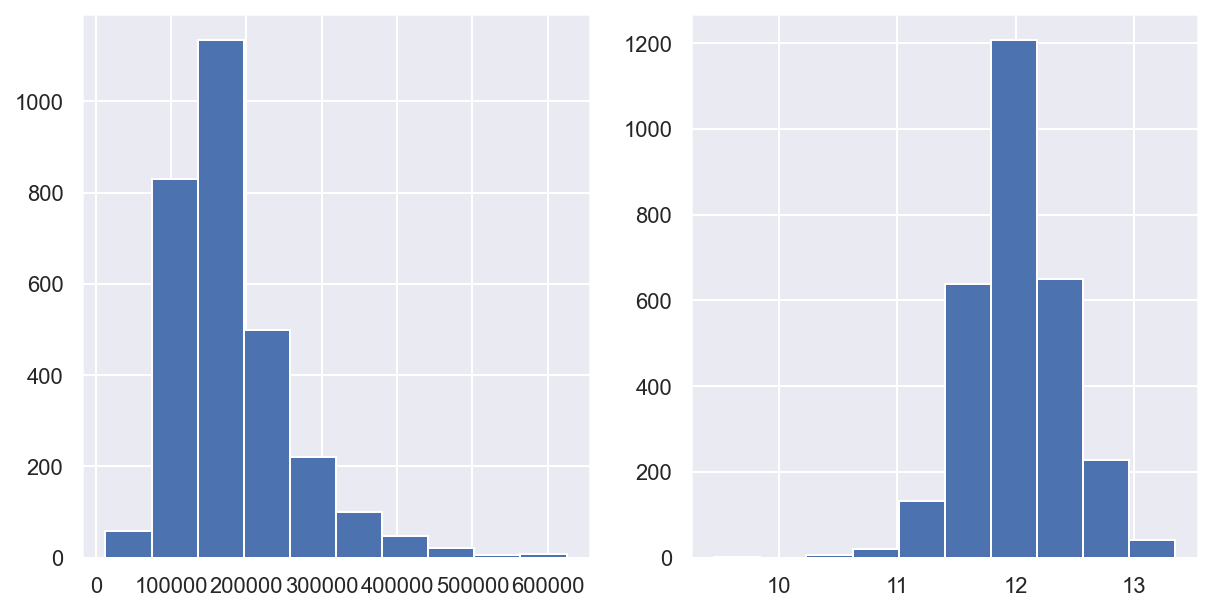

In [17]:
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
df['SalePrice'].hist(ax=ax_before)
df['SalePrice'].apply(np.log1p).hist(ax=ax_after)

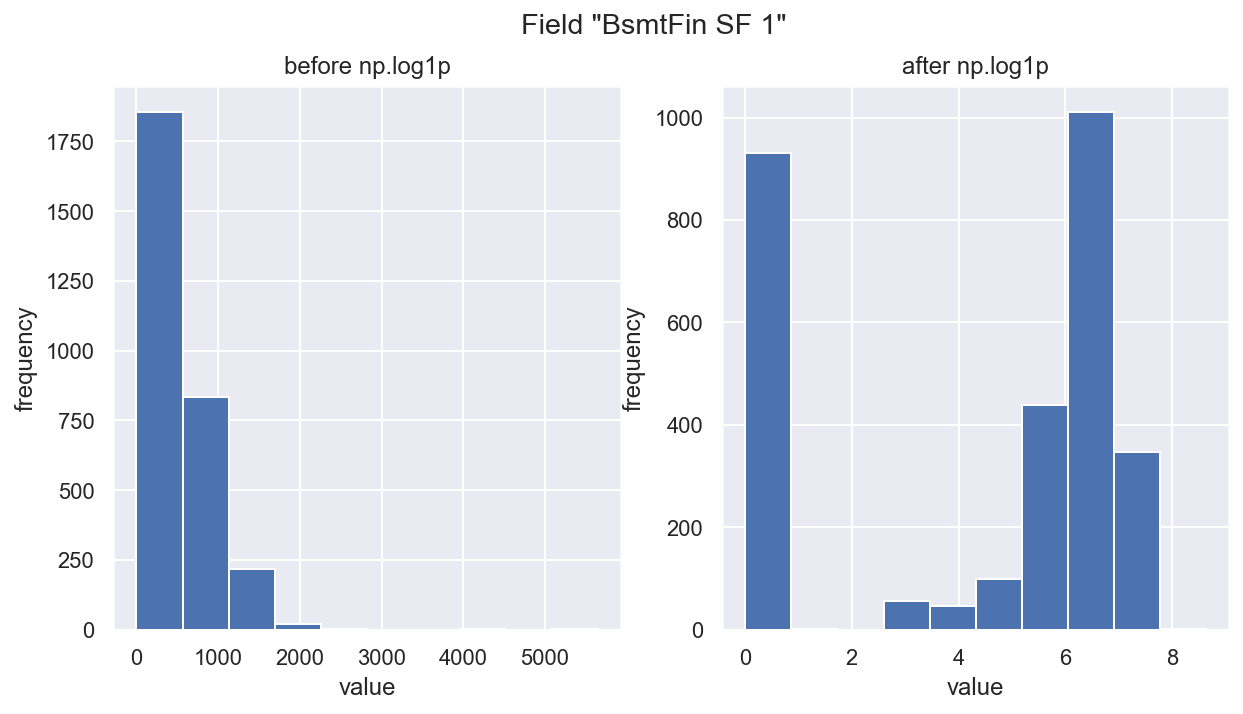

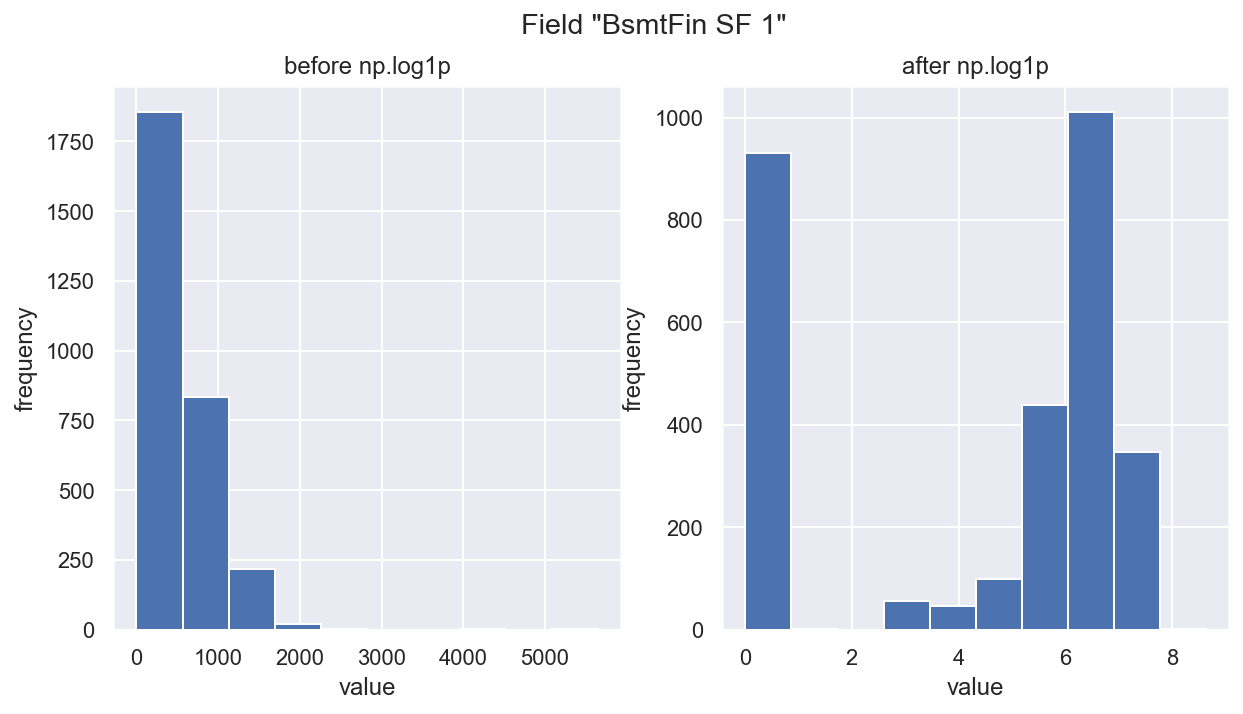

In [17]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "BsmtFin SF 1"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
df[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [18]:
# just testing
print('hey "{}"'.format(field)) 

hey "BsmtFin SF 1"
hey "BsmtFin SF 1"


In [19]:
# Perform the skew transformation:

for col in skew_cols.index.values:
    if col == "SalePrice":
        continue
    df[col] = df[col].apply(np.log1p)

In [20]:
# We now have a larger set of potentially-useful features
df.shape

(2930, 82)

(2930, 82)

In [21]:
# There are a *lot* of variables. Let's go back to our saved original data and look at how many values are missing for each variable. 
df = data
data.isnull().sum().sort_values()

Order                0
Sale Condition       0
Heating QC           0
Central Air          0
1st Flr SF           0
                  ... 
Fireplace Qu      1422
Fence             2358
Alley             2732
Misc Feature      2824
Pool QC           2917
Length: 82, dtype: int64

Order                0
Sale Condition       0
Heating QC           0
Central Air          0
1st Flr SF           0
                  ... 
Fireplace Qu      1422
Fence             2358
Alley             2732
Misc Feature      2824
Pool QC           2917
Length: 82, dtype: int64

 Let's pick out just a few numeric columns to illustrate basic feature transformations.

In [22]:
smaller_df= df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond', 
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                      'Garage Cars','SalePrice']]

In [24]:
# Now we can look at summary statistics of the subset data
smaller_df.describe().T #.T() makes it a transpose

count           mean           std      min        25%  \
Lot Area        2930.0   10147.921843   7880.017759   1300.0    7440.25   
Overall Qual    2930.0       6.094881      1.411026      1.0       5.00   
Overall Cond    2930.0       5.563140      1.111537      1.0       5.00   
Year Built      2930.0    1971.356314     30.245361   1872.0    1954.00   
Year Remod/Add  2930.0    1984.266553     20.860286   1950.0    1965.00   
Gr Liv Area     2930.0    1499.690444    505.508887    334.0    1126.00   
Full Bath       2930.0       1.566553      0.552941      0.0       1.00   
Bedroom AbvGr   2930.0       2.854266      0.827731      0.0       2.00   
Fireplaces      2930.0       0.599317      0.647921      0.0       0.00   
Garage Cars     2929.0       1.766815      0.760566      0.0       1.00   
SalePrice       2930.0  180796.060068  79886.692357  12789.0  129500.00   

                     50%        75%       max  
Lot Area          9436.5   11555.25  215245.0  
Overall Qual         6.0       7.00      10.0  
Overall Cond         5.0       6.00       9.0  
Year Built        1973.0    2001.00    2010.0  
Year Remod/Add    1993.0    2004.00    2010.0  
Gr Liv Area       1442.0    1742.75    5642.0  
Full Bath            2.0       2.00       4.0  
Bedroom AbvGr        3.0       3.00       8.0  
Fireplaces           1.0       1.00       4.0  
Garage Cars          2.0       2.00       5.0  
SalePrice       160000.0  213500.00  755000.0

count           mean           std      min        25%  \
Lot Area        2930.0   10147.921843   7880.017759   1300.0    7440.25   
Overall Qual    2930.0       6.094881      1.411026      1.0       5.00   
Overall Cond    2930.0       5.563140      1.111537      1.0       5.00   
Year Built      2930.0    1971.356314     30.245361   1872.0    1954.00   
Year Remod/Add  2930.0    1984.266553     20.860286   1950.0    1965.00   
Gr Liv Area     2930.0    1499.690444    505.508887    334.0    1126.00   
Full Bath       2930.0       1.566553      0.552941      0.0       1.00   
Bedroom AbvGr   2930.0       2.854266      0.827731      0.0       2.00   
Fireplaces      2930.0       0.599317      0.647921      0.0       0.00   
Garage Cars     2929.0       1.766815      0.760566      0.0       1.00   
SalePrice       2930.0  180796.060068  79886.692357  12789.0  129500.00   

                     50%        75%       max  
Lot Area          9436.5   11555.25  215245.0  
Overall Qual         6.0       7.00      10.0  
Overall Cond         5.0       6.00       9.0  
Year Built        1973.0    2001.00    2010.0  
Year Remod/Add    1993.0    2004.00    2010.0  
Gr Liv Area       1442.0    1742.75    5642.0  
Full Bath            2.0       2.00       4.0  
Bedroom AbvGr        3.0       3.00       8.0  
Fireplaces           1.0       1.00       4.0  
Garage Cars          2.0       2.00       5.0  
SalePrice       160000.0  213500.00  755000.0

In [25]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2930 non-null   int64  
 1   Overall Qual    2930 non-null   int64  
 2   Overall Cond    2930 non-null   int64  
 3   Year Built      2930 non-null   int64  
 4   Year Remod/Add  2930 non-null   int64  
 5   Gr Liv Area     2930 non-null   int64  
 6   Full Bath       2930 non-null   int64  
 7   Bedroom AbvGr   2930 non-null   int64  
 8   Fireplaces      2930 non-null   int64  
 9   Garage Cars     2929 non-null   float64
 10  SalePrice       2930 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 251.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2930 non-null   int64  
 1   Overall 

In [26]:
# There appears to be one NA in Garage Cars - we will take a simple approach and fill it with 0
smaller_df = smaller_df.fillna(0)

In [27]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2930 non-null   int64  
 1   Overall Qual    2930 non-null   int64  
 2   Overall Cond    2930 non-null   int64  
 3   Year Built      2930 non-null   int64  
 4   Year Remod/Add  2930 non-null   int64  
 5   Gr Liv Area     2930 non-null   int64  
 6   Full Bath       2930 non-null   int64  
 7   Bedroom AbvGr   2930 non-null   int64  
 8   Fireplaces      2930 non-null   int64  
 9   Garage Cars     2930 non-null   float64
 10  SalePrice       2930 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 251.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2930 non-null   int64  
 1   Overall 


### Pair plot of features
Now that we have a nice, filtered dataset, let's generate visuals to better understand the target and feature-target relationships: pairplot is great for this!

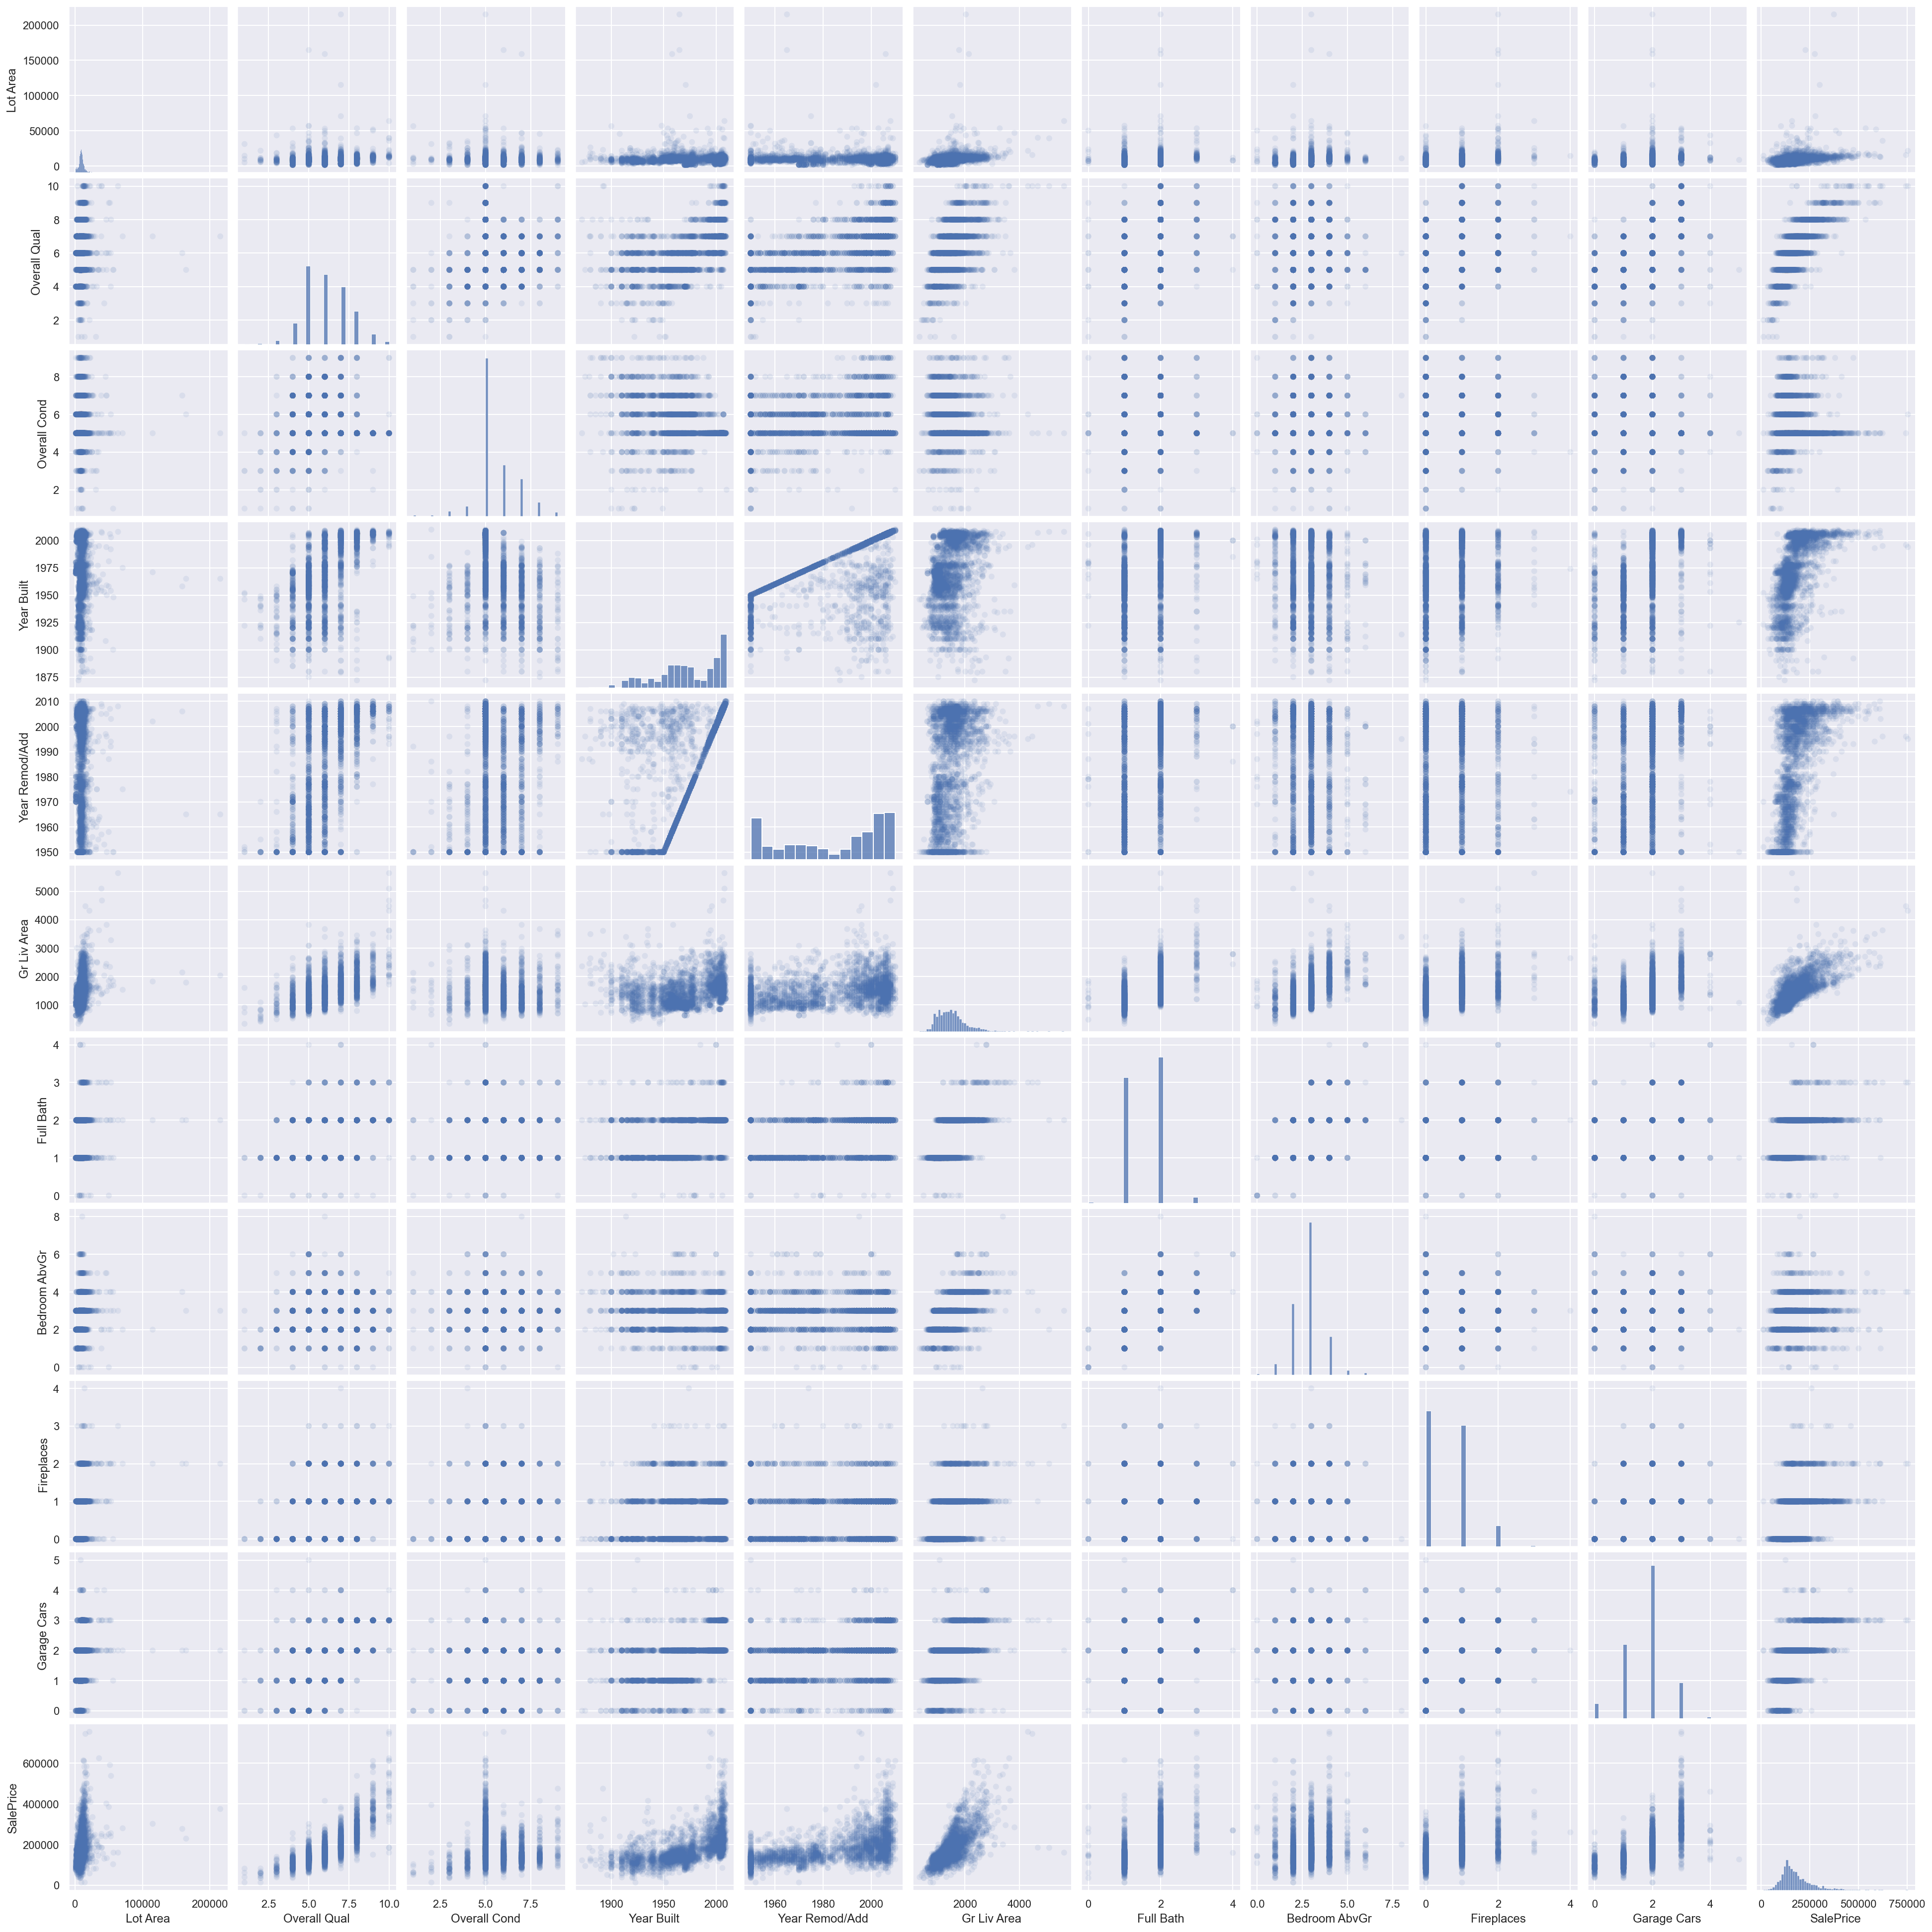

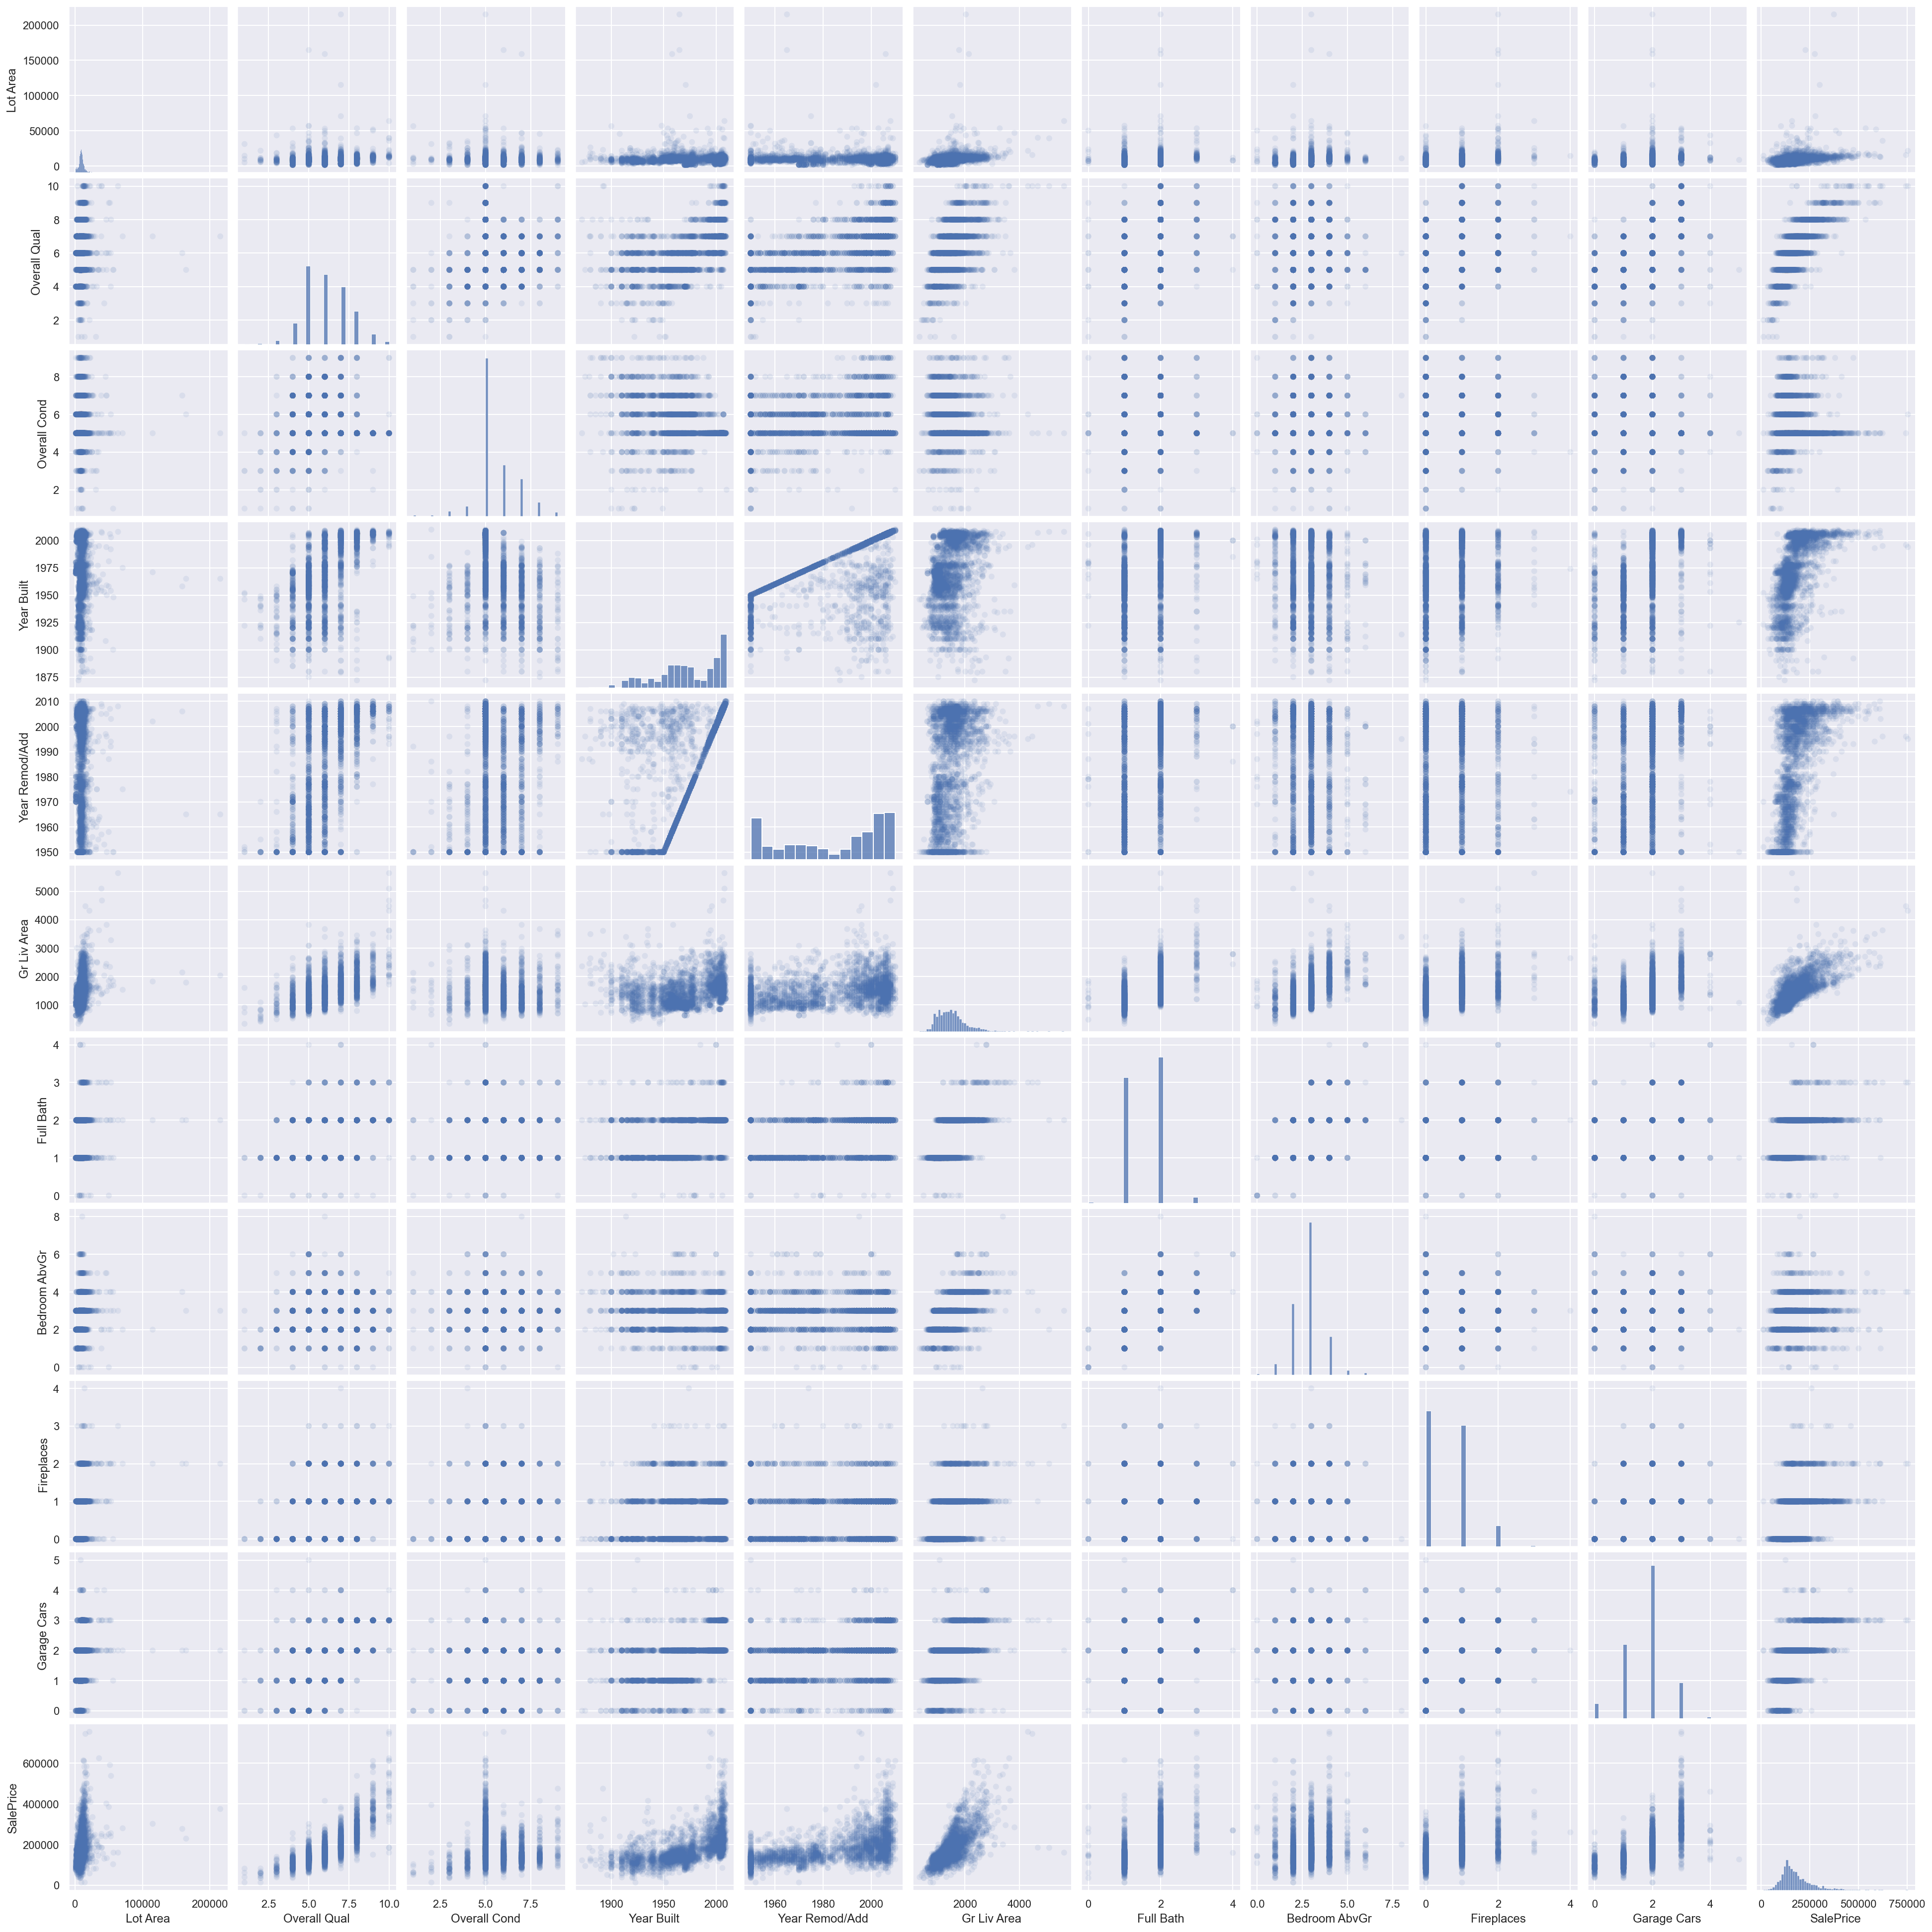

In [32]:
sns.pairplot(smaller_df, plot_kws=dict(alpha=.1, edgecolor='none'))

---
**Data Exploration Discussion**: 

1. What do these plots tell us about the distribution of the target?   

2. What do these plots tell us about the relationship between the features and the target? Do you think that linear regression is well-suited to this problem? Do any feature transformations come to mind?

3. What do these plots tell us about the relationship between various pairs of features? Do you think there may be any problems here? 

---

#### Suppose our target variable is the SalePrice. We can set up separate variables for features and target.

In [33]:
#Separate our features from our target

X = smaller_df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond', 
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                      'Garage Cars']]

y = smaller_df['SalePrice']

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2930 non-null   int64  
 1   Overall Qual    2930 non-null   int64  
 2   Overall Cond    2930 non-null   int64  
 3   Year Built      2930 non-null   int64  
 4   Year Remod/Add  2930 non-null   int64  
 5   Gr Liv Area     2930 non-null   int64  
 6   Full Bath       2930 non-null   int64  
 7   Bedroom AbvGr   2930 non-null   int64  
 8   Fireplaces      2930 non-null   int64  
 9   Garage Cars     2930 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 229.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2930 non-null   int64  
 1   Overall Qual    2930 non-null   int64  
 2   Overall C

Now that we have feature/target data X, y ready to go, we're nearly ready to fit and evaluate a baseline model using our current feature set. We'll need to create a **train/validation split** before we fit and score the model. 

Since we'll be repeatedly splitting X, y into the same train/val partitions and fitting/scoring new models as we update our feature set, we'll define a reusable function that completes all these steps, making our code/process more efficient going forward. 

Great, let's go ahead and run this function on our baseline feature set and take some time to analyze the results.

### Basic feature engineering: adding polynomial and interaction terms

One of the first things that we looked for in the pairplot was evidence about the relationship between each feature and the target. In certain features like _'Overall Qual'_ and _'Gr Liv Qual'_, we notice an upward-curved relationship rather than a simple linear correspondence. This suggests that we should add quadratic **polynomial terms or transformations** for those features, allowing us to express that non-linear relationship while still using linear regression as our model.

Luckily, pandas makes it quite easy to quickly add those square terms as additional features to our original feature set. We'll do so and evaluate our model again below.

As we add to our baseline set of features, we'll create a copy of the latest benchmark so that we can continue to store our older feature sets. 
### Polynomial Features

In [35]:
X2 = X.copy()

X2['OQ2'] = X2['Overall Qual'] ** 2
X2['GLA2'] = X2['Gr Liv Area'] ** 2


As is, each feature is treated as an independent quantity. However, there may be **interaction effects**, in which the impact of one feature may dependent on the current value of a different feature.

For example, there may be a higher premium for increasing _'Overall Qual'_ for houses that were built more recently. If such a premium or a similar effect exists, a feature that multiplies _'Overall Qual'_ by _'Year Built'_ can help us capture it.

Another style of interaction term involves feature proprtions: for example, to get at something like quality per square foot we could divide _'Overall Qual'_ by _'Lot Area'_.

Let's try adding both of these interaction terms and see how they impact the model results.

### Feature interactions

In [36]:
X3 = X2.copy()

# multiplicative interaction
X3['OQ_x_YB'] = X3['Overall Qual'] * X3['Year Built']

# division interaction
X3['OQ_/_LA'] = X3['Overall Qual'] / X3['Lot Area']



-----
**Interaction Feature Exercise**: What other interactions do you think might be helpful? Why? 

-----

### Categories and features derived from category aggregates 

Incorporating **categorical features** into linear regression models is fairly straightforward: we can create a new feature column for each category value, and fill these columns with 1s and 0s to indicate which category is present for each row. This method is called **dummy variables** or **one-hot-encoding**.

We'll first explore this using the _'House Style'_ feature from the original dataframe. Before going straight to dummy variables, it's a good idea to check category counts to make sure all categories have reasonable representation.

In [37]:
data['House Style'].value_counts()

1Story    1481
2Story     873
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: House Style, dtype: int64

1Story    1481
2Story     873
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: House Style, dtype: int64

This looks ok, and here's a quick look at how dummy features actually appear:

In [38]:
pd.get_dummies(df['House Style'], drop_first=True).head()

1.5Unf  1Story  2.5Fin  2.5Unf  2Story  SFoyer  SLvl
0       0       1       0       0       0       0     0
1       0       1       0       0       0       0     0
2       0       1       0       0       0       0     0
3       0       1       0       0       0       0     0
4       0       0       0       0       1       0     0

1.5Unf  1Story  2.5Fin  2.5Unf  2Story  SFoyer  SLvl
0       0       1       0       0       0       0     0
1       0       1       0       0       0       0     0
2       0       1       0       0       0       0     0
3       0       1       0       0       0       0     0
4       0       0       0       0       1       0     0

We can call `pd.get_dummies()` on our entire dataset to quickly get data with all the original features and dummy variable representation of any categorical features. Let's look at some variable values.

In [39]:
nbh_counts = df.Neighborhood.value_counts()
nbh_counts

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

For this category, let's map the few least-represented neighborhoods to an "other" category before adding the feature to our feature set and running a new benchmark.

In [40]:
other_nbhs = list(nbh_counts[nbh_counts <= 8].index)

other_nbhs

['Greens', 'GrnHill', 'Landmrk']

['Greens', 'GrnHill', 'Landmrk']

In [44]:
X4 = X3.copy()

X4['Neighborhood'] = df['Neighborhood'].replace(other_nbhs, 'Other')
X4.Neighborhood.value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Other       11
Blueste     10
Name: Neighborhood, dtype: int64

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Other       11
Blueste     10
Name: Neighborhood, dtype: int64

#### Getting to fancier features

Let's close out our introduction to feature engineering by considering a more complex type of feature that may work very nicely for certain problems. It doesn't seem to add a great deal over what we have so far, but it's a style of engineering to keep in mind for the future.

We'll create features that capture where a feature value lies relative to the members of a category it belongs to. In particular, we'll calculate deviance of a row's feature value from the mean value of the category that row belongs to. This helps to capture information about a feature relative to the category's distribution, e.g. how nice a house is relative to other houses in its neighborhood or of its style.

Below we define reusable code for generating features of this form, feel free to repurpose it for future feature engineering work!

In [ ]:
def add_deviation_feature(X, feature, category):
    
    # temp groupby object
    category_gb = X.groupby(category)[feature]
    
    # create category means and standard deviations for each observation
    category_mean = category_gb.transform(lambda x: x.mean())
    category_std = category_gb.transform(lambda x: x.std())
    
    # compute stds from category mean for each feature value,
    # add to X as new feature
    deviation_feature = (X[feature] - category_mean) / category_std 
    X[feature + '_Dev_' + category] = deviation_feature  

And now let's use our feature generation code to add 2 new deviation features, and run a final benchmark.

In [ ]:
X5 = X4.copy()
X5['House Style'] = df['House Style']
add_deviation_feature(X5, 'Year Built', 'House Style')
add_deviation_feature(X5, 'Overall Qual', 'Neighborhood')


## Polynomial Features in Scikit-Learn

`sklearn` allows you to build many higher-order terms at once with `PolynomialFeatures`

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#Instantiate and provide desired degree; 
#   Note: degree=2 also includes intercept, degree 1 terms, and cross-terms

pf = PolynomialFeatures(degree=2)

In [ ]:
features = ['Lot Area', 'Overall Qual']
pf.fit(df[features])

In [ ]:
pf.get_feature_names()  #Must add input_features = features for appropriate names

In [ ]:
feat_array = pf.transform(df[features])
pd.DataFrame(feat_array, columns = pf.get_feature_names(input_features=features))

## Recap

While we haven't yet turned to prediction, these feature engineering exercises set the stage. Generally, feature engineering often follows a sort of [_Pareto principle_](https://en.wikipedia.org/wiki/Pareto_principle), where a large bulk of the predictive gains can be reached through adding a set of intuitive, strong features like polynomial transforms and interactions. Directly incorporating additional information like categorical variables can also be very helpful. Beyond this point, additional feature engineering can provide significant, but potentially diminishing returns. Whether it's worth it depends on the use case for the model. 

---
### Machine Learning Foundation (C) 2020 IBM Corporation